# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

**Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže pomocí `%timeit` a různých výsledných velikostí matic (např. 101, 1001, 10001).**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_col += 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [4]:
A = integer_spiral(7)
print(A)

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]


In [5]:
def integer_spiral_numpy(n):
    A = np.zeros((n + 2, n + 2))
    pos_row = n//2 + 1
    pos_col = n//2 + 1
    index_pole = 1
    i = 2
    rada_cisel = np.arange(1, n**2 + 1)
    A[pos_row, pos_col] = rada_cisel[0]
    pos_row -= 1
    while i < n:
        A[pos_row, pos_col:pos_col - i:-1] = rada_cisel[index_pole:index_pole + i]
        pos_row += 1
        pos_col -= i - 1
        index_pole += i
        A[pos_row:pos_row + i, pos_col] = rada_cisel[index_pole:index_pole + i]
        pos_row += i - 1
        pos_col += 1
        index_pole += i
        A[pos_row, pos_col:pos_col + i] = rada_cisel[index_pole:index_pole + i]
        pos_row -= 1
        pos_col += i - 1
        index_pole += i 
        A[pos_row:pos_row - i:-1, pos_col] = rada_cisel[index_pole:index_pole + i]
        pos_row -= i
        index_pole += i
        i += 2  

    return A[1:-1, 1:-1]  # ořízneme nulový okraj

In [10]:
A = integer_spiral_numpy(7)
print(A)

%timeit integer_spiral_numpy(101)
%timeit integer_spiral(101)

%timeit integer_spiral_numpy(1001)
%timeit integer_spiral(1001)

%timeit integer_spiral_numpy(10001)
# %timeit integer_spiral(10001)


[[31. 30. 29. 28. 27. 26. 49.]
 [32. 13. 12. 11. 10. 25. 48.]
 [33. 14.  3.  2.  9. 24. 47.]
 [34. 15.  4.  1.  8. 23. 46.]
 [35. 16.  5.  6.  7. 22. 45.]
 [36. 17. 18. 19. 20. 21. 44.]
 [37. 38. 39. 40. 41. 42. 43.]]
180 µs ± 2.33 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
13 ms ± 1.84 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.04 ms ± 565 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.11 s ± 8.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
483 ms ± 34.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
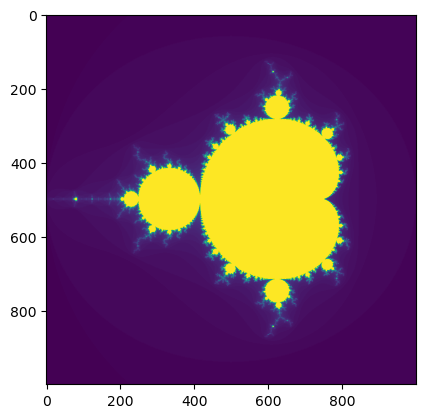

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [21]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    x = np.linspace(x_min, x_max, n)
    y = np.linspace(y_min, y_max, n)
    X, Y = np.meshgrid(x, y * 1j)
    z = np.zeros_like(x)
    c = X + Y
    divergence_matrix = np.zeros((n,n))
    for i in range(k):
        z = z**2 + c
        it_sum = np.abs(z) < 2
        divergence_matrix[it_sum] += 1
    
    return divergence_matrix

/tmp/ipykernel_42103/3005787616.py:9: RuntimeWarning: overflow encountered in square
  z = z**2 + c
/tmp/ipykernel_42103/3005787616.py:9: RuntimeWarning: invalid value encountered in square
  z = z**2 + c
/tmp/ipykernel_42103/3005787616.py:10: RuntimeWarning: overflow encountered in absolute
  it_sum = np.abs(z) < 2


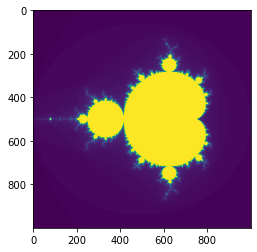

In [22]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
1. Vykreslete také Juliovu množinu (viz. https://en.wikipedia.org/wiki/Julia_set)
2. Použijte váš kód pro číselnou spirálu a vytvořte obrázek prvočíselné spirály (viz. https://en.wikipedia.org/wiki/Ulam_spiral). Stačí vytvořit matici kde 

In [44]:
def julian_set(x_min = -1.5, x_max = 1.5, y_min = -1.5, y_max = 1.5, n = 1000, k = 100, c = -0.5251993 -0.5251993j):
    x = np.linspace(x_min, x_max, n)
    y = np.linspace(y_min, y_max, n)
    X, Y = np.meshgrid(x, y * 1j)
    z = X + Y
    divergence_matrix = np.zeros((n,n))
    for i in range(k):
        z = z**2 + c
        it_sum = np.abs(z) < 2
        divergence_matrix[it_sum] += 1
    
    return divergence_matrix

/tmp/ipykernel_42103/2397804539.py:8: RuntimeWarning: overflow encountered in square
  z = z**2 + c
/tmp/ipykernel_42103/2397804539.py:8: RuntimeWarning: invalid value encountered in square
  z = z**2 + c
/tmp/ipykernel_42103/2397804539.py:9: RuntimeWarning: overflow encountered in absolute
  it_sum = np.abs(z) < 2


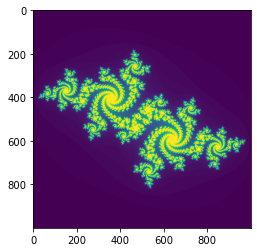

In [45]:
n = 1000
k = 100

divergence_matrix = julian_set(n=n, k=k)
plt.imshow(divergence_matrix)


In [73]:
def integer_spiral_prime(n):
    A = np.zeros((n + 2, n + 2))
    pos_row = n//2 + 1
    pos_col = n//2 + 1
    index_pole = 1
    i = 2
    rada_cisel = np.zeros(n**2 + 1)
    primes = np.array([n for n in range(2,n**2+1) if all((n % m) != 0 for m in range(2,int(np.sqrt(n))+1))])
    rada_cisel[primes - 1] = 1
    print(rada_cisel)
    A[pos_row, pos_col] = rada_cisel[0]
    pos_row -= 1
    while i < n:
        A[pos_row, pos_col:pos_col - i:-1] = rada_cisel[index_pole:index_pole + i]
        pos_row += 1
        pos_col -= i - 1
        index_pole += i
        A[pos_row:pos_row + i, pos_col] = rada_cisel[index_pole:index_pole + i]
        pos_row += i - 1
        pos_col += 1
        index_pole += i
        A[pos_row, pos_col:pos_col + i] = rada_cisel[index_pole:index_pole + i]
        pos_row -= 1
        pos_col += i - 1
        index_pole += i 
        A[pos_row:pos_row - i:-1, pos_col] = rada_cisel[index_pole:index_pole + i]
        pos_row -= i
        index_pole += i
        i += 2  

    return A[1:-1, 1:-1]  # ořízneme nulový okraj

[0. 1. 1. ... 0. 0. 0.]


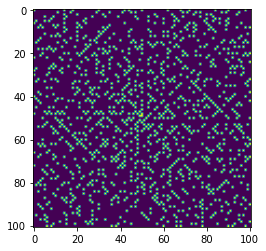

In [77]:
A = integer_spiral_prime(101)
plt.imshow(A)